## Imports

In [1]:
# Imports

#General
import numpy as np
import itertools

# System
import os, fnmatch

# Visualization
import seaborn #visualization library, must be imported before all other plotting libraries
import matplotlib.pyplot as plt
from IPython.core.display import HTML, display

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Random Seed
from numpy.random import seed
seed(1)

# Audio
import librosa.display, librosa

## Get filenames

In [2]:
# Get files in data path
path='./shords_dataset/'
# Get Audio Files
files = []
for root, dirnames, filenames in os.walk(path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d audio files in %s"%(len(files),path))

found 502 audio files in ./shords_dataset/


## Prepare labels from filenames

In [3]:
# Get Labels
labels =[]
classes=['major','minor']
color_dict={'major':'blue', 'minor':'red'}
color_list=[]
for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            color_list.append(color_dict[name])
            break
    else:
        labels.append('other')

## Encode Labels

In [4]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

2 classes: major, minor


## Parameters for MFCC

In [5]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier

## Function to Calculate Audio Features: MFCC

In [6]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector

## Load audio files, calculate features and create feature vectors

In [7]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

get 1 of 502 = ./shords_dataset/major\1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00102309 0.00117503 0.00129075 ... 0.00128633 0.00139543 0.00148438] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 2 of 502 = ./shords_dataset/major\1_10.wav
get 3 of 502 = ./shords_dataset/major\1_11.wav
get 4 of 502 = ./shords_dataset/major\1_12.wav
get 5 of 502 = ./shords_dataset/major\1_2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 1.2333985e-07 -8.1362759e-07 -1.5358426e-06 ...  1.3660616e-01
  1.4312550e-01  1.4945590e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.03816266 0.03736088 0.03523097 ... 0.0161934  0.01364165 0.00966676] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00670512  0.0043581   0.00205445 ... -0.05471111 -0.05636266
 -0.05760269] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 6 of 502 = ./shords_dataset/major\1_3.wav
get 7 of 502 = ./shords_dataset/major\1_4.wav
get 8 of 502 = ./shords_dataset/major\1_5.wav
get 9 of 502 = ./shords_dataset/major\1_6.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00084486  0.00080745  0.0007434  ... -0.00456534 -0.00454875
 -0.00458409] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00014538 -0.00019699 -0.00021008 ...  0.00344291  0.00312387
  0.00278731] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00017927 0.00018746 0.00018152 ... 0.0002924  0.00027533 0.00026736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 10 of 502 = ./shords_dataset/major\1_7.wav
get 11 of 502 = ./shords_dataset/major\1_8.wav
get 12 of 502 = ./shords_dataset/major\1_9.wav
get 13 of 502 = ./shords_dataset/major\2_1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00138089 0.00147072 0.00160693 ... 0.00068873 0.00065518 0.00058313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00208337 0.00196246 0.00187146 ... 0.03644337 0.035707   0.03503935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00274541  0.00275873  0.002768   ... -0.00236502 -0.0023043
 -0.00223884] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\

get 14 of 502 = ./shords_dataset/major\2_10.wav
get 15 of 502 = ./shords_dataset/major\2_11.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00012774  0.00016828  0.00013883 ... -0.00034025 -0.00230923
 -0.00427718] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.6383511e-08  1.5604731e-07  3.8257548e-07 ... -9.3489559e-03
 -1.5106705e-03  5.1249466e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 16 of 502 = ./shords_dataset/major\2_12.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[1.0970216e-08 4.0780375e-08 6.7002887e-08 ... 1.7968720e-01 2.0296431e-01
 2.2532548e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 9.4185211e-09  2.4720389e-08  1.7745933e-08 ... -1.9467482e-01
 -2.2078152e-01 -2.4835759e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.01236423 -0.01207392 -0.01200016 ... -0.11436394 -0.11226813
 -0.10965037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n

get 17 of 502 = ./shords_dataset/major\2_2.wav
get 18 of 502 = ./shords_dataset/major\2_3.wav
get 19 of 502 = ./shords_dataset/major\2_4.wav
get 20 of 502 = ./shords_dataset/major\2_5.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.01086268 -0.01458275 -0.01544347 ... -0.00225206 -0.00247799
 -0.00452328] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.27082823e-08  1.06943304e-07  2.18796288e-07 ... -6.90646283e-03
 -2.95761577e-03  1.61557971e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00011066  0.00012492  0.00016464 ... -0.00731513 -0.00907882
 -0.01086158] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=

get 21 of 502 = ./shords_dataset/major\2_6.wav
get 22 of 502 = ./shords_dataset/major\2_7.wav
get 23 of 502 = ./shords_dataset/major\2_8.wav
get 24 of 502 = ./shords_dataset/major\2_9.wav
get 25 of 502 = ./shords_dataset/major\3_1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.5997537e-08 -1.9226556e-07 -5.2007783e-07 ...  3.9316464e-02
  4.0380962e-02  4.2773638e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.9507822e-07  1.8516067e-06  3.9945548e-06 ... -2.3865104e-01
 -2.3173863e-01 -2.1833046e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[2.9326306e-05 6.5618558e-05 9.6314703e-05 ... 7.9480056e-03 7.9217302e-03
 7.9041328e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspect

get 26 of 502 = ./shords_dataset/major\3_10.wav
get 27 of 502 = ./shords_dataset/major\3_11.wav
get 28 of 502 = ./shords_dataset/major\3_12.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.0284774e-11
  2.2655708e-12 -2.7048754e-15] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.2079029e-08 -1.6068790e-07 -3.6317235e-07 ...  7.9916674e-08
  7.8893983e-08  2.9200669e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00057278 -0.00068246 -0.00097048 ... -0.22573936 -0.22098388
 -0.21489896] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr

get 29 of 502 = ./shords_dataset/major\3_2.wav
get 30 of 502 = ./shords_dataset/major\3_3.wav
get 31 of 502 = ./shords_dataset/major\3_4.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.01215147 0.01194345 0.01187925 ... 0.00217528 0.00216436 0.00154555] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-2.5906095e-08  1.1992281e-06  2.0305192e-06 ...  3.8132970e-03
  5.7291547e-03  7.5314431e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00280961 -0.00271348 -0.00261233 ... -0.00590605 -0.00603707
 -0.0060594 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 32 of 502 = ./shords_dataset/major\3_5.wav
get 33 of 502 = ./shords_dataset/major\3_6.wav
get 34 of 502 = ./shords_dataset/major\3_7.wav
get 35 of 502 = ./shords_dataset/major\3_8.wav
get 36 of 502 = ./shords_dataset/major\3_9.wav
get 37 of 502 = ./shords_dataset/major\4_1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.8529088e-04 -2.3910026e-04 -7.4754440e-05 ... -7.1322516e-02
 -6.6736735e-02 -6.2061530e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.8868199e-06  2.4711803e-06  1.5557498e-06 ... -2.4594959e-07
 -9.8557393e-08 -2.1509958e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.7230385e-06  1.9161234e-06 -1.8096777e-07 ... -1.4491594e-05
 -1.3709558e-05 -1.1213085e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.me

get 38 of 502 = ./shords_dataset/major\4_10.wav
get 39 of 502 = ./shords_dataset/major\4_11.wav
get 40 of 502 = ./shords_dataset/major\4_12.wav
get 41 of 502 = ./shords_dataset/major\4_13.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.0012893  0.00126002 0.00121353 ... 0.30396813 0.30908778 0.31375694] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00026843 0.00019092 0.00010398 ... 0.00306424 0.00234537 0.0016811 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.0002171  0.00021646 0.00016395 ... 0.14263067 0.14503093 0.14735597] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/i

get 42 of 502 = ./shords_dataset/major\4_14.wav
get 43 of 502 = ./shords_dataset/major\4_15.wav
get 44 of 502 = ./shords_dataset/major\4_16.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00185025  0.0019704   0.00216869 ... -0.08642174 -0.0837223
 -0.08103216] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00044868 -0.00059276 -0.00055886 ... -0.09985536 -0.10179941
 -0.10355774] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00063554  0.00059774  0.00049334 ... -0.04121182 -0.04177552
 -0.04247594] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 45 of 502 = ./shords_dataset/major\4_17.wav
get 46 of 502 = ./shords_dataset/major\4_18.wav
get 47 of 502 = ./shords_dataset/major\4_19.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.64395182e-08 -6.34261923e-08 -1.38657271e-07 ... -1.21291123e-01
 -1.21142291e-01 -1.20942466e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00028605 -0.00040963 -0.0005489  ...  0.2018317   0.19969267
  0.19758475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.0005289  0.00046117 0.00029639 ... 0.1090011  0.11508472 0.12112571] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)

get 48 of 502 = ./shords_dataset/major\4_2.wav
get 49 of 502 = ./shords_dataset/major\4_20.wav
get 50 of 502 = ./shords_dataset/major\4_21.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00048971 -0.0004071  -0.00037871 ...  0.10591599  0.10271995
  0.09949382] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00038131  0.00045511  0.00057412 ... -0.0016643  -0.00153096
 -0.00147115] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00098811 -0.00083466 -0.00064063 ... -0.13314217 -0.1286246
 -0.12393008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 51 of 502 = ./shords_dataset/major\4_22.wav
get 52 of 502 = ./shords_dataset/major\4_23.wav
get 53 of 502 = ./shords_dataset/major\4_24.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00039706 -0.00027356 -0.00022528 ...  0.16888943  0.15747602
  0.14588863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00034875 -0.00040109 -0.00040363 ...  0.01657204  0.01681113
  0.01704736] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00086185 -0.0009435  -0.00106709 ... -0.13944477 -0.13796145
 -0.13647088] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 54 of 502 = ./shords_dataset/major\4_3.wav
get 55 of 502 = ./shords_dataset/major\4_4.wav
get 56 of 502 = ./shords_dataset/major\4_5.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00033174 -0.00027042 -0.00021386 ... -0.05700823 -0.05785307
 -0.05872636] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00241058  0.00234729  0.00234781 ... -0.00918106 -0.00892822
 -0.00874789] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 57 of 502 = ./shords_dataset/major\4_6.wav
get 58 of 502 = ./shords_dataset/major\4_7.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00031126 0.00035102 0.0003548  ... 0.0118246  0.01039084 0.00895619] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-6.8004279e-05 -1.0436357e-05  6.4556683e-05 ... -1.3653915e-02
 -1.4221335e-02 -1.4803503e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00052181 0.00056477 0.00060938 ... 0.0951464  0.09582866 0.09637243] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Tha

get 59 of 502 = ./shords_dataset/major\4_8.wav
get 60 of 502 = ./shords_dataset/major\4_9.wav
get 61 of 502 = ./shords_dataset/major\5_1.wav
get 62 of 502 = ./shords_dataset/major\5_10.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00060938  0.00081214  0.00087624 ... -0.14007416 -0.1302486
 -0.12027927] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00154489 -0.00162671 -0.00156485 ... -0.00176056 -0.00195779
 -0.00207876] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-2.4304991e-09 -1.0227388e-08 -2.4422674e-08 ... -2.1430883e-01
 -2.1482818e-01 -2.1523207e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)

get 63 of 502 = ./shords_dataset/major\5_11.wav
get 64 of 502 = ./shords_dataset/major\5_12.wav
get 65 of 502 = ./shords_dataset/major\5_13.wav
get 66 of 502 = ./shords_dataset/major\5_14.wav
get 67 of 502 = ./shords_dataset/major\5_15.wav
get 68 of 502 = ./shords_dataset/major\5_16.wav
get 69 of 502 = ./shords_dataset/major\5_17.wav
get 70 of 502 = ./shords_dataset/major\5_18.wav
get 71 of 502 = ./shords_dataset/major\5_19.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00053828 -0.00052696 -0.00048538 ... -0.03293283 -0.03192391
 -0.03090611] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-2.12938394e-04 -1.42671604e-04 -1.06809035e-04 ...  1.61880895e-01
  1.65786728e-01  1.69356152e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-9.7977638e-05 -1.8133818e-05  5.3818512e-05 ...  2.0791001e-04
  2.1874622e-04  2.8794381e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram

get 72 of 502 = ./shords_dataset/major\5_2.wav
get 73 of 502 = ./shords_dataset/major\5_20.wav
get 74 of 502 = ./shords_dataset/major\5_21.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-4.4941621e-07 -6.6001411e-07 -2.6011733e-07 ...  3.0738571e-01
  3.2154113e-01  3.4230474e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.5420504e-06 -2.7438318e-06 -3.9056486e-06 ...  5.9909922e-07
  4.7260835e-07  2.3671973e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 75 of 502 = ./shords_dataset/major\5_22.wav
get 76 of 502 = ./shords_dataset/major\5_23.wav
get 77 of 502 = ./shords_dataset/major\5_24.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 7.1075743e-07 2.2848937e-07
 3.5254640e-08] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[6.8605124e-07 9.3494384e-07 1.1313698e-06 ... 1.5750654e-09 2.6798139e-08
 1.5880136e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.9384743e-06 -1.4048015e-06 -6.5920591e-07 ...  5.7917017e-01
  5.7119095e-01  5.6186193e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram

get 78 of 502 = ./shords_dataset/major\5_25.wav
get 79 of 502 = ./shords_dataset/major\5_26.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.4533446e-06  2.3571934e-06 -1.1970091e-07 ...  2.6208104e-07
 -1.9285544e-07 -3.6494507e-07] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.9728940e-06  3.8869853e-06  3.2132916e-06 ... -3.8036135e-01
 -2.8366861e-01 -1.4183052e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.24982613 -0.2046959
 -0.16358553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=

get 80 of 502 = ./shords_dataset/major\5_27.wav
get 81 of 502 = ./shords_dataset/major\5_28.wav
get 82 of 502 = ./shords_dataset/major\5_29.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[3.2747776e-04 1.9769986e-04 5.6719105e-05 ... 5.4550920e-02 5.3174537e-02
 5.1694248e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.5682583e-04 -1.9173564e-04 -6.0598679e-05 ...  1.4166236e-01
  1.4174210e-01  1.4102958e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00055355  0.00055217  0.0004273  ... -0.08724998 -0.08538636
 -0.08353569] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n

get 83 of 502 = ./shords_dataset/major\5_3.wav
get 84 of 502 = ./shords_dataset/major\5_30.wav
get 85 of 502 = ./shords_dataset/major\5_31.wav
get 86 of 502 = ./shords_dataset/major\5_32.wav
get 87 of 502 = ./shords_dataset/major\5_33.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[7.5760414e-05 5.4716118e-05 5.0088602e-05 ... 5.5952396e-02 5.6992669e-02
 5.8001377e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.83449089e-07 -7.04368802e-07 -1.48870538e-06 ...  1.26962215e-01
  1.22739986e-01  1.32121548e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00021852  0.00026841  0.00029504 ... -0.02816937 -0.02125129
 -0.01415572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr

get 88 of 502 = ./shords_dataset/major\5_34.wav
get 89 of 502 = ./shords_dataset/major\5_35.wav
get 90 of 502 = ./shords_dataset/major\5_36.wav
get 91 of 502 = ./shords_dataset/major\5_37.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.19225182e-06 -1.51963095e-05 -5.35041145e-05 ... -2.34069437e-01
 -2.33006284e-01 -2.31836021e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00015419 -0.00018354 -0.00025465 ...  0.0369255   0.03699773
  0.03729131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00018324 -0.00021171 -0.00024782 ...  0.15759946  0.15248613
  0.14743887] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=

get 92 of 502 = ./shords_dataset/major\5_38.wav
get 93 of 502 = ./shords_dataset/major\5_39.wav
get 94 of 502 = ./shords_dataset/major\5_4.wav
get 95 of 502 = ./shords_dataset/major\5_40.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.9427575e-04 -1.2387703e-04  5.5668016e-07 ... -1.8934493e-01
 -1.8756275e-01 -1.8549904e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.5568417e-05 -3.2578311e-05 -3.9807110e-05 ... -2.0953347e-01
 -2.0663436e-01 -2.0373090e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00939655  0.00241375 -0.00301382 ...  0.16197306  0.06502514
 -0.01597206] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr

get 96 of 502 = ./shords_dataset/major\5_41.wav
get 97 of 502 = ./shords_dataset/major\5_42.wav
get 98 of 502 = ./shords_dataset/major\5_43.wav
get 99 of 502 = ./shords_dataset/major\5_44.wav
get 100 of 502 = ./shords_dataset/major\5_5.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.3519888e-04 -8.1073294e-06  1.0051550e-04 ... -7.8280032e-02
 -7.6058611e-02 -7.3885821e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00077827 -0.00076212 -0.00076766 ... -0.09599315 -0.09539602
 -0.09467666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[2.5546691e-05 1.1177924e-04 1.7032654e-04 ... 3.1906056e-01 3.1456339e-01
 3.0978349e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n

get 101 of 502 = ./shords_dataset/major\5_6.wav
get 102 of 502 = ./shords_dataset/major\5_7.wav
get 103 of 502 = ./shords_dataset/major\5_8.wav
get 104 of 502 = ./shords_dataset/major\5_9.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00027555 -0.00025466 -0.000237   ...  0.06990468  0.06315783
  0.05655247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00147887  0.0014077   0.00142898 ... -0.07760461 -0.07549816
 -0.07401526] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00035101 -0.00043345 -0.00051651 ...  0.08428191  0.08477593
  0.08518867] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 105 of 502 = ./shords_dataset/major\6_1.wav
get 106 of 502 = ./shords_dataset/major\6_10.wav
get 107 of 502 = ./shords_dataset/major\6_11.wav
get 108 of 502 = ./shords_dataset/major\6_12.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00072909 0.00083832 0.00091054 ... 0.09212804 0.08888735 0.08559859] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.02552659 0.02613278 0.02472039 ... 0.02648971 0.03268922 0.06157843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 4.4155044e-08  1.6107775e-07  3.2159770e-07 ... -1.5922093e-01
 -1.6848066e-01 -1.7662691e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 109 of 502 = ./shords_dataset/major\6_13.wav
get 110 of 502 = ./shords_dataset/major\6_14.wav
get 111 of 502 = ./shords_dataset/major\6_15.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.0028218   0.00322601  0.00349557 ... -0.1698234  -0.171929
 -0.17391622] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00092013  0.00095526  0.00099592 ... -0.12027703 -0.12375203
 -0.12715709] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 112 of 502 = ./shords_dataset/major\6_16.wav
get 113 of 502 = ./shords_dataset/major\6_17.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 1.4730103e-04  6.9167734e-05  3.6784470e-05 ... -3.5732742e-02
 -3.5686702e-02 -3.5528217e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00242648 -0.00246092 -0.00251499 ...  0.15761188  0.15341243
  0.14904791] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00151149 0.00148742 0.00147182 ... 0.11391497 0.12155242 0.12882124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 114 of 502 = ./shords_dataset/major\6_18.wav
get 115 of 502 = ./shords_dataset/major\6_19.wav
get 116 of 502 = ./shords_dataset/major\6_2.wav
get 117 of 502 = ./shords_dataset/major\6_20.wav
get 118 of 502 = ./shords_dataset/major\6_21.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00118749  0.00068641  0.00020011 ... -0.05410793 -0.05812818
 -0.06218056] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00138924 0.00142747 0.00146851 ... 0.01563066 0.01847844 0.02133354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00059097 0.00104405 0.00146304 ... 0.1404235  0.14137141 0.14195427] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 119 of 502 = ./shords_dataset/major\6_22.wav
get 120 of 502 = ./shords_dataset/major\6_23.wav
get 121 of 502 = ./shords_dataset/major\6_24.wav
get 122 of 502 = ./shords_dataset/major\6_25.wav
get 123 of 502 = ./shords_dataset/major\6_26.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00158335 -0.00160367 -0.00179627 ... -0.02426933 -0.03064379
 -0.03697101] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00458942  0.0046934   0.00469407 ... -0.12627746 -0.12399616
 -0.1214392 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00286269 -0.00260467 -0.00253372 ... -0.03663366 -0.02845481
 -0.02050796] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 124 of 502 = ./shords_dataset/major\6_27.wav
get 125 of 502 = ./shords_dataset/major\6_28.wav
get 126 of 502 = ./shords_dataset/major\6_29.wav
get 127 of 502 = ./shords_dataset/major\6_3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00303345  0.00314573  0.0029922  ... -0.03239896 -0.03159159
 -0.03085182] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00668643 0.0066623  0.00670262 ... 0.22548278 0.22550961 0.22514276] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[4.4772448e-04 2.7235062e-04 7.1029637e-05 ... 1.2354618e-01 1.4491637e-01
 1.6602920e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Th

get 128 of 502 = ./shords_dataset/major\6_30.wav
get 129 of 502 = ./shords_dataset/major\6_31.wav
get 130 of 502 = ./shords_dataset/major\6_32.wav
get 131 of 502 = ./shords_dataset/major\6_33.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00076575 0.00058614 0.00048587 ... 0.10289432 0.10960975 0.11634284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00043588 -0.0004007  -0.00027029 ...  0.19971104  0.20803382
  0.21602179] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00054487  0.00049749  0.00047828 ...  0.00182642 -0.00142917
 -0.00456507] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 132 of 502 = ./shords_dataset/major\6_34.wav
get 133 of 502 = ./shords_dataset/major\6_35.wav
get 134 of 502 = ./shords_dataset/major\6_36.wav
get 135 of 502 = ./shords_dataset/major\6_37.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.000231   -0.00019242 -0.00020623 ...  0.00751764  0.00293351
 -0.00171684] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00226546 0.00215757 0.00197742 ... 0.05315568 0.05479899 0.0564982 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[1.1657978e-06 1.7719483e-06 2.2834458e-06 ... 3.2643214e-01 3.2783356e-01
 3.2893133e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 136 of 502 = ./shords_dataset/major\6_38.wav
get 137 of 502 = ./shords_dataset/major\6_39.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.6621043e-11  3.5577100e-11  3.6480263e-11 ... -4.2057744e-01
 -4.2022592e-01 -4.1888061e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00255452 0.00293398 0.0032311  ... 0.03499557 0.04415397 0.04988376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[1.2236951e-05 1.2703776e-05 1.1267720e-05 ... 1.5664268e-01 1.4238535e-01
 1.2762785e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n

get 138 of 502 = ./shords_dataset/major\6_4.wav
get 139 of 502 = ./shords_dataset/major\6_40.wav
get 140 of 502 = ./shords_dataset/major\6_41.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.5792612e-06 -8.8740615e-07 -2.8926141e-07 ... -1.3297135e-01
 -1.3667811e-01 -1.3986944e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.30175622e-05 -1.43973539e-05 -1.66050067e-05 ... -1.04683436e-01
 -1.00354575e-01 -9.59857032e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-8.3992796e-07 -1.2722275e-07 -2.5479525e-07 ...  3.9473385e-02
  3.3990074e-02  2.8427640e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feat

get 141 of 502 = ./shords_dataset/major\6_42.wav
get 142 of 502 = ./shords_dataset/major\6_43.wav
get 143 of 502 = ./shords_dataset/major\6_44.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[1.1943825e-06 2.3719303e-06 2.9287539e-06 ... 1.0994404e-01 1.0317259e-01
 9.6098997e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00046173 -0.00095218 -0.00151336 ...  0.05172113  0.04861753
  0.04514864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[3.7799456e-08 1.3924711e-07 2.8942972e-07 ... 3.0409176e-02 2.9412042e-02
 2.8927555e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=

get 144 of 502 = ./shords_dataset/major\6_45.wav
get 145 of 502 = ./shords_dataset/major\6_46.wav
get 146 of 502 = ./shords_dataset/major\6_47.wav
get 147 of 502 = ./shords_dataset/major\6_48.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00053713 0.00109584 0.00157411 ... 0.04631632 0.03662352 0.02779251] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00088928  0.00142945  0.00207002 ... -0.2295943  -0.23165777
 -0.23435585] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 148 of 502 = ./shords_dataset/major\6_49.wav
get 149 of 502 = ./shords_dataset/major\6_5.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00728843  0.00721422  0.00710269 ... -0.30591694 -0.3028164
 -0.29898432] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.0019822  0.00247909 0.0034844  ... 0.21755263 0.23960364 0.25893605] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00189699 0.001859   0.00179284 ... 0.17862396 0.17791994 0.17708704] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\

get 150 of 502 = ./shords_dataset/major\6_50.wav
get 151 of 502 = ./shords_dataset/major\6_6.wav
get 152 of 502 = ./shords_dataset/major\6_7.wav
get 153 of 502 = ./shords_dataset/major\6_8.wav
get 154 of 502 = ./shords_dataset/major\6_9.wav
get 155 of 502 = ./shords_dataset/major\9_1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 5.7128782e-05  4.4544948e-05  2.0976824e-05 ... -9.9354247e-03
 -9.3256347e-03 -8.6321533e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.0003576   0.00036369  0.00040742 ... -0.20729737 -0.20815487
 -0.2083696 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00188188 0.00211045 0.00233766 ... 0.22093791 0.22069426 0.21997379] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 156 of 502 = ./shords_dataset/major\9_10.wav
get 157 of 502 = ./shords_dataset/major\9_11.wav
get 158 of 502 = ./shords_dataset/major\9_12.wav
get 159 of 502 = ./shords_dataset/major\9_13.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 1.5062169e-06  1.4070479e-06  1.0489674e-06 ... -3.0043751e-01
 -2.8917432e-01 -2.8282419e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 5.4247704e-07  3.2000540e-07 -6.2251740e-07 ...  1.7083324e-01
  1.5548740e-01  1.4187808e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.3857329e-04 -1.4515361e-04 -1.4310061e-04 ...  3.5573706e-01
  3.4974819e-01  3.4518522e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.me

get 160 of 502 = ./shords_dataset/major\9_14.wav
get 161 of 502 = ./shords_dataset/major\9_15.wav
get 162 of 502 = ./shords_dataset/major\9_16.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-2.7585986e-23 -2.7812178e-23 -2.7778926e-23 ... -1.9279560e-01
 -1.7195636e-01 -1.5312015e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-2.1788054e-04 -1.4476654e-04 -1.2818539e-04 ... -2.2355048e-01
 -2.1042189e-01 -1.9897732e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00112568 0.00109232 0.00099903 ... 0.04272209 0.04204815 0.04167963] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_

get 163 of 502 = ./shords_dataset/major\9_17.wav
get 164 of 502 = ./shords_dataset/major\9_18.wav
get 165 of 502 = ./shords_dataset/major\9_19.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.6634290e-05 -4.6498371e-07 -5.4540506e-05 ... -2.5005896e-02
 -2.7074199e-02 -2.8652322e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 6.5486012e-05  1.4544875e-05 -6.6469132e-05 ... -2.3784363e-01
 -2.2958204e-01 -2.2091256e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00011382 0.00016696 0.00022144 ... 0.01623205 0.03094331 0.04682295] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_

get 166 of 502 = ./shords_dataset/major\9_2.wav
get 167 of 502 = ./shords_dataset/major\9_20.wav
get 168 of 502 = ./shords_dataset/major\9_21.wav
get 169 of 502 = ./shords_dataset/major\9_22.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00066424 -0.00068677 -0.00071706 ...  0.09386861  0.0822216
  0.07067392] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00111026 -0.00111871 -0.0010908  ...  0.02285204  0.01854193
  0.01434503] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00143484 0.0012154  0.00089116 ... 0.06460294 0.05208673 0.03916445] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 170 of 502 = ./shords_dataset/major\9_23.wav
get 171 of 502 = ./shords_dataset/major\9_24.wav
get 172 of 502 = ./shords_dataset/major\9_25.wav
get 173 of 502 = ./shords_dataset/major\9_26.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00053457 0.00039451 0.00025434 ... 0.05175853 0.04230869 0.0326948 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.8287332e-04  4.2074273e-05 -3.5427755e-04 ... -4.0892866e-02
 -3.8794238e-02 -3.7177157e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.0016759   0.001664    0.00172304 ... -0.13856581 -0.14305964
 -0.14702173] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 174 of 502 = ./shords_dataset/major\9_27.wav
get 175 of 502 = ./shords_dataset/major\9_28.wav
get 176 of 502 = ./shords_dataset/major\9_29.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[4.1132033e-04 3.2865666e-04 2.4714280e-04 ... 3.2290274e-01 3.2653400e-01
 3.2984650e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00093782  0.00104085  0.00106219 ... -0.2868543  -0.27551612
 -0.26397553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.0005640e-04 -7.2038689e-05 -5.8226335e-05 ...  4.9357176e-02
  4.0519908e-02  3.1562824e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n

get 177 of 502 = ./shords_dataset/major\9_3.wav
get 178 of 502 = ./shords_dataset/major\9_30.wav
get 179 of 502 = ./shords_dataset/major\9_31.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00074869 -0.00066146 -0.00058971 ... -0.0410038  -0.04905232
 -0.0568735 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00047979  0.00048066  0.00045528 ... -0.02413222 -0.03779529
 -0.05147931] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.001231    0.00130786  0.00127836 ... -0.06165179 -0.0539571
 -0.04593229] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\

get 180 of 502 = ./shords_dataset/major\9_32.wav
get 181 of 502 = ./shords_dataset/major\9_33.wav
get 182 of 502 = ./shords_dataset/major\9_34.wav
get 183 of 502 = ./shords_dataset/major\9_35.wav
get 184 of 502 = ./shords_dataset/major\9_36.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00095184 0.00074022 0.00053875 ... 0.01567397 0.01350237 0.01084354] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.06113821  0.06215734  0.06308837 ... -0.05792028 -0.05592819
 -0.05355124] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00178691 -0.00167033 -0.00149935 ...  0.09282955  0.09620359
  0.09982863] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 185 of 502 = ./shords_dataset/major\9_37.wav
get 186 of 502 = ./shords_dataset/major\9_38.wav
get 187 of 502 = ./shords_dataset/major\9_39.wav
get 188 of 502 = ./shords_dataset/major\9_4.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 9.6840537e-08 -5.7041325e-07 -1.2243560e-06 ...  2.6459464e-01
  2.8263080e-01  3.0091211e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00065098 -0.00067416 -0.0006818  ...  0.12038478  0.11765313
  0.1142657 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 1.6828761e-06  3.1706022e-06  4.0316941e-06 ... -1.4513700e-01
 -1.2156318e-01 -1.0885981e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr

get 189 of 502 = ./shords_dataset/major\9_40.wav
get 190 of 502 = ./shords_dataset/major\9_41.wav
get 191 of 502 = ./shords_dataset/major\9_42.wav
get 192 of 502 = ./shords_dataset/major\9_43.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.1658559e-06 -3.6112615e-07 -4.1162039e-06 ... -7.8768760e-01
 -7.5896776e-01 -7.3009765e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.2463473e-06  3.6215333e-06  4.1616668e-06 ... -3.1216329e-01
 -3.1350103e-01 -3.1524953e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.09299041 0.09361495 0.09485527 ... 0.40295094 0.4094791  0.4215808 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_

get 193 of 502 = ./shords_dataset/major\9_44.wav
get 194 of 502 = ./shords_dataset/major\9_45.wav
get 195 of 502 = ./shords_dataset/major\9_46.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 6.63239371e-06  1.08878739e-05  2.10447779e-05 ... -1.11544885e-01
 -1.42314151e-01 -1.71120390e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 7.02944362e-06  6.84560746e-06  6.02665750e-06 ... -8.31851587e-02
 -1.05607562e-01 -1.10328674e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 196 of 502 = ./shords_dataset/major\9_47.wav
get 197 of 502 = ./shords_dataset/major\9_48.wav
get 198 of 502 = ./shords_dataset/major\9_49.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-8.2643260e-15 -8.3045939e-15 -8.2777218e-15 ... -1.4332958e-01
 -1.1418824e-01 -8.2040317e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.39252006e-06 -3.58472448e-06 -3.10387327e-06 ... -8.51910636e-02
 -1.02212794e-01 -1.18302390e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00089377 -0.00107633 -0.00135368 ... -0.2888331  -0.28508633
 -0.28345788] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram

get 199 of 502 = ./shords_dataset/major\9_5.wav
get 200 of 502 = ./shords_dataset/major\9_50.wav
get 201 of 502 = ./shords_dataset/major\9_51.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-7.8671934e-07  6.3418611e-07  2.3448133e-06 ...  5.3648829e-01
  5.3743964e-01  5.3225720e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 5.0274498e-06  5.9107738e-06  6.9348371e-06 ... -5.7300800e-01
 -5.5290306e-01 -5.2259928e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.9906028e-06  4.0665464e-06  4.4934604e-06 ... -1.5878819e-01
 -1.6728327e-01 -1.6888911e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.me

get 202 of 502 = ./shords_dataset/major\9_52.wav
get 203 of 502 = ./shords_dataset/major\9_53.wav
get 204 of 502 = ./shords_dataset/major\9_54.wav
get 205 of 502 = ./shords_dataset/major\9_55.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-8.2200808e-07 -1.8539019e-07 -1.3186796e-07 ... -4.1280665e-02
 -5.9689440e-02 -7.0799500e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 1.0282789e-05  7.9038446e-06  4.7618946e-06 ... -8.5847773e-02
 -7.9671666e-02 -8.4205657e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.4486036e-06 -1.8015827e-06 -2.4808401e-06 ...  1.3712570e-01
  1.4939483e-01  1.4375472e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.me

get 206 of 502 = ./shords_dataset/major\9_56.wav
get 207 of 502 = ./shords_dataset/major\9_57.wav
get 208 of 502 = ./shords_dataset/major\9_58.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 6.3223706e-07  4.2577730e-07 -4.6903304e-07 ... -4.9982864e-01
 -4.9408495e-01 -4.9412704e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-6.8941370e-07 -5.9028929e-07 -4.7513132e-07 ...  1.0834686e-01
  2.2741871e-01  3.5221332e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.8221096e-06 -4.3969258e-06 -5.5296832e-06 ... -1.2679264e-01
 -4.9430441e-02  1.2402417e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.me

get 209 of 502 = ./shords_dataset/major\9_59.wav
get 210 of 502 = ./shords_dataset/major\9_6.wav
get 211 of 502 = ./shords_dataset/major\9_60.wav
get 212 of 502 = ./shords_dataset/major\9_61.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00294264 -0.00293622 -0.00294721 ...  0.03842897  0.03606116
  0.0336756 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-4.2743517e-07 -1.3381639e-06 -2.1959506e-06 ...  5.6992644e-01
  5.5770224e-01  5.5195522e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 6.3986668e-06  7.0977048e-06  7.1101790e-06 ...  8.3767913e-02
  3.0086439e-02 -1.4126197e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr

get 213 of 502 = ./shords_dataset/major\9_62.wav
get 214 of 502 = ./shords_dataset/major\9_63.wav
get 215 of 502 = ./shords_dataset/major\9_64.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.7491526e-06  4.9835339e-06  4.6102746e-06 ... -8.6572714e-02
 -1.2669574e-01 -1.6842072e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-4.1020721e-06 -3.7837126e-06 -3.6669230e-06 ... -2.8990906e-01
 -2.8540212e-01 -2.7975842e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 216 of 502 = ./shords_dataset/major\9_65.wav
get 217 of 502 = ./shords_dataset/major\9_66.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-7.1860413e-06 -3.8295530e-06  3.0002752e-06 ...  6.5939671e-01
  6.7124820e-01  6.7950046e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 5.2168321e-06  7.0355469e-08 -4.3411342e-06 ... -3.4203273e-01
 -3.7223145e-01 -3.9475328e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.7567028e-05 -2.3809502e-05 -1.0078056e-04 ...  4.3015197e-01
  4.2220199e-01  4.0816650e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.me

get 218 of 502 = ./shords_dataset/major\9_67.wav
get 219 of 502 = ./shords_dataset/major\9_68.wav
get 220 of 502 = ./shords_dataset/major\9_69.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.5177482e-06 -1.5351270e-06 -5.9831348e-07 ... -5.4650003e-01
 -5.4468167e-01 -5.4287130e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.1175603e-06 -1.4455984e-06 -5.1390356e-07 ... -5.4295141e-01
 -5.3411025e-01 -5.2615923e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00094802 -0.00093257 -0.00091117 ...  0.27495882  0.27219957
  0.26923022] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr

get 221 of 502 = ./shords_dataset/major\9_7.wav
get 222 of 502 = ./shords_dataset/major\9_70.wav
get 223 of 502 = ./shords_dataset/major\9_71.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.03060248 0.03149534 0.03168384 ... 0.02883082 0.01603586 0.00266691] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.0991427e-07  2.7972936e-07  5.1406533e-07 ... -2.1888764e-01
 -2.6539141e-01 -2.9959446e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 224 of 502 = ./shords_dataset/major\9_72.wav
get 225 of 502 = ./shords_dataset/major\9_73.wav
get 226 of 502 = ./shords_dataset/major\9_74.wav
get 227 of 502 = ./shords_dataset/major\9_75.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 5.7040211e-07 -1.0333143e-08 -9.7250677e-07 ... -2.3840206e-02
  3.6259051e-02  1.0230899e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.2295484e-04 -1.4501625e-04 -1.5437737e-04 ... -1.2505411e-01
 -1.2796772e-01 -1.2883866e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 4.02136102e-05  7.62156196e-05  1.10258414e-04 ... -1.01072840e-01
 -9.21970084e-02 -8.31242949e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feat

get 228 of 502 = ./shords_dataset/major\9_76.wav
get 229 of 502 = ./shords_dataset/major\9_77.wav
get 230 of 502 = ./shords_dataset/major\9_78.wav
get 231 of 502 = ./shords_dataset/major\9_79.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.0005523   0.000486    0.0004088  ... -0.3516739  -0.35496578
 -0.35799268] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.0006137  -0.00070195 -0.00077603 ... -0.02469829 -0.02365949
 -0.02423119] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00039721 -0.00037398 -0.00037473 ... -0.1101099  -0.09315311
 -0.07541762] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 232 of 502 = ./shords_dataset/major\9_8.wav
get 233 of 502 = ./shords_dataset/major\9_80.wav
get 234 of 502 = ./shords_dataset/major\9_81.wav
get 235 of 502 = ./shords_dataset/major\9_82.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00120971 -0.00101776 -0.00089761 ... -0.03488647 -0.04234605
 -0.04967035] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00066636 -0.00082809 -0.00095149 ... -0.06979076 -0.06059069
 -0.05157634] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00051893 -0.00040565 -0.000363   ...  0.10811852  0.12109739
  0.1340612 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 236 of 502 = ./shords_dataset/major\9_83.wav
get 237 of 502 = ./shords_dataset/major\9_84.wav
get 238 of 502 = ./shords_dataset/major\9_85.wav
get 239 of 502 = ./shords_dataset/major\9_86.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[2.1802991e-04 1.4370985e-04 7.8375429e-05 ... 2.4202050e-01 2.4188000e-01
 2.4172711e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.0571798e-03 -6.5640075e-04 -2.7331428e-04 ...  3.7336808e-01
  3.7114850e-01  3.6869642e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00165118 -0.0018904  -0.00209298 ... -0.23235773 -0.23973759
 -0.24674025] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n

get 240 of 502 = ./shords_dataset/major\9_87.wav
get 241 of 502 = ./shords_dataset/major\9_88.wav
get 242 of 502 = ./shords_dataset/major\9_89.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00177789 -0.00183985 -0.00183668 ... -0.004856   -0.00876778
 -0.01318738] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.1105074e-06 -5.7169071e-08  8.2701746e-07 ...  6.6426182e-01
  6.8336797e-01  7.0157003e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.0003889   0.0004241   0.00045097 ... -0.11643502 -0.1202309
 -0.12455635] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)

get 243 of 502 = ./shords_dataset/major\9_9.wav
get 244 of 502 = ./shords_dataset/major\9_90.wav
get 245 of 502 = ./shords_dataset/major\9_91.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00296286 0.00298224 0.00296357 ... 0.10385863 0.09989444 0.09614065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-6.7261746e-05  3.6282868e-06  8.0763813e-05 ...  6.4217985e-02
  5.5567887e-02  4.6423249e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 5.6407164e-04  3.8620079e-04  1.9920690e-04 ... -3.6112952e-01
 -3.5926417e-01 -3.5734320e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_

get 246 of 502 = ./shords_dataset/major\9_92.wav
get 247 of 502 = ./shords_dataset/major\9_93.wav
get 248 of 502 = ./shords_dataset/major\9_94.wav
get 249 of 502 = ./shords_dataset/major\9_95.wav
get 250 of 502 = ./shords_dataset/major\9_96.wav
get 251 of 502 = ./shords_dataset/minor\1_1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.7646625e-05 -1.6507556e-04 -3.4483010e-04 ... -1.1911303e-01
 -1.0287350e-01 -8.6389534e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00015183 -0.00015682 -0.00016028 ... -0.04442536 -0.03507202
 -0.02541771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.6744286e-04 -4.9251776e-06  2.6432882e-04 ...  3.4944709e-02
  3.5355527e-02  3.5609234e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr

get 252 of 502 = ./shords_dataset/minor\1_10.wav
get 253 of 502 = ./shords_dataset/minor\1_11.wav
get 254 of 502 = ./shords_dataset/minor\1_12.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-7.37118242e-08 -2.85819084e-07 -6.24566610e-07 ... -1.08296379e-01
 -1.08082294e-01 -1.07773304e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00234755 -0.00228334 -0.00204933 ...  0.1035409   0.10698336
  0.11022529] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00630674  0.00613091  0.00619844 ... -0.09708789 -0.09511653
 -0.09297296] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=

get 255 of 502 = ./shords_dataset/minor\1_13.wav
get 256 of 502 = ./shords_dataset/minor\1_14.wav
get 257 of 502 = ./shords_dataset/minor\1_15.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00023288 -0.00040624 -0.00048867 ... -0.18571766 -0.18107438
 -0.17616098] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-5.2978876e-08 -1.3080178e-07  6.9947852e-08 ... -3.1585559e-01
 -2.3816423e-01 -1.8974321e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00697485 -0.0040449   0.00105619 ...  0.4880316   0.4874388
  0.4911974 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)

get 258 of 502 = ./shords_dataset/minor\1_16.wav
get 259 of 502 = ./shords_dataset/minor\1_17.wav
get 260 of 502 = ./shords_dataset/minor\1_18.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[2.9231614e-08 1.1432674e-07 3.4710806e-07 ... 2.1680918e-01 2.7308971e-01
 3.2661361e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00172371 0.00162614 0.00156886 ... 0.01705957 0.01204568 0.00768372] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00026027  0.00033668  0.00044011 ... -0.12295247 -0.11452657
 -0.10553011] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 261 of 502 = ./shords_dataset/minor\1_19.wav
get 262 of 502 = ./shords_dataset/minor\1_2.wav
get 263 of 502 = ./shords_dataset/minor\1_20.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00017739 -0.0002405  -0.00028718 ...  0.06541098  0.06114491
  0.05568724] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00303438 -0.00338863 -0.0037416  ...  0.00156499  0.00152163
  0.00147913] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00025505 -0.00029484 -0.00026508 ...  0.05378107  0.05420444
  0.05471722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 264 of 502 = ./shords_dataset/minor\1_21.wav
get 265 of 502 = ./shords_dataset/minor\1_22.wav
get 266 of 502 = ./shords_dataset/minor\1_23.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[7.9107158e-05 1.5558908e-04 8.1111932e-05 ... 3.3934176e-02 3.0670667e-02
 2.8992601e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00039734 -0.00031131 -0.00019008 ... -0.12274474 -0.11986108
 -0.11679284] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.52477272e-04  1.48162027e-04  3.91073700e-05 ... -9.63216871e-02
 -9.85513106e-02 -1.00943826e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr

get 267 of 502 = ./shords_dataset/minor\1_24.wav
get 268 of 502 = ./shords_dataset/minor\1_25.wav
get 269 of 502 = ./shords_dataset/minor\1_26.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00102079  0.00094461  0.00090957 ... -0.13642906 -0.13478449
 -0.13270843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.01534396 0.01215986 0.0064898  ... 0.31179494 0.30813673 0.2870757 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[1.9223164e-08 1.1445454e-07 3.4340562e-07 ... 5.2232569e-01 5.2742928e-01
 5.3226548e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Th

get 270 of 502 = ./shords_dataset/minor\1_27.wav
get 271 of 502 = ./shords_dataset/minor\1_28.wav
get 272 of 502 = ./shords_dataset/minor\1_29.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.8054988e-08 -1.6186303e-07 -4.1092071e-07 ...  3.8588312e-01
  3.7235957e-01  3.5819811e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-4.6879688e-08 -2.0159874e-07 -4.6203760e-07 ... -5.4342979e-01
 -5.3704083e-01 -5.2963352e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.0137070e-07 -3.4358461e-08 -4.6536380e-07 ... -3.8029260e-03
  5.2146690e-05  1.4209769e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.me

get 273 of 502 = ./shords_dataset/minor\1_3.wav
get 274 of 502 = ./shords_dataset/minor\1_30.wav
get 275 of 502 = ./shords_dataset/minor\1_31.wav
get 276 of 502 = ./shords_dataset/minor\1_32.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.01017506 -0.00935328 -0.00859372 ... -0.23754571 -0.24430232
 -0.25161594] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-6.0331648e-05 -6.5008388e-04 -1.1192826e-03 ...  2.6760978e-01
  3.0945048e-01  3.4251606e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00148436 -0.00100046 -0.00030557 ...  0.09458768  0.0906766
  0.08725245] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)

get 277 of 502 = ./shords_dataset/minor\1_33.wav
get 278 of 502 = ./shords_dataset/minor\1_34.wav
get 279 of 502 = ./shords_dataset/minor\1_35.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 5.8547233e-04  5.9580147e-05 -3.9889308e-04 ... -6.5430146e-01
 -6.6008383e-01 -6.6463655e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 7.5830051e-11  4.2860392e-11  1.2051634e-11 ... -2.8680268e-01
 -2.8881150e-01 -2.9074138e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.4190250e-09 -1.6927632e-09 -1.1807865e-09 ...  4.6984157e-01
  4.6972606e-01  4.6885866e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.me

get 280 of 502 = ./shords_dataset/minor\1_36.wav
get 281 of 502 = ./shords_dataset/minor\1_4.wav
get 282 of 502 = ./shords_dataset/minor\1_5.wav
get 283 of 502 = ./shords_dataset/minor\1_6.wav
get 284 of 502 = ./shords_dataset/minor\1_7.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-5.4124600e-12 -4.9118305e-12 -4.3845743e-12 ...  2.2613721e-01
  2.3757364e-01  2.4912935e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.8194418e-08 -1.7170035e-07 -4.3519134e-07 ...  4.4666854e-01
  4.4308576e-01  4.3822727e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 1.4606635e-08  7.2605701e-08  1.7323310e-07 ...  2.7183527e-03
 -4.0459324e-02 -4.7580451e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.me

get 285 of 502 = ./shords_dataset/minor\1_8.wav
get 286 of 502 = ./shords_dataset/minor\1_9.wav
get 287 of 502 = ./shords_dataset/minor\2_1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00041025 -0.00044239 -0.00044492 ...  0.12965567  0.11613771
  0.10267463] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00060041 -0.00083911 -0.00111411 ... -0.00605249 -0.00211563
  0.00166905] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 288 of 502 = ./shords_dataset/minor\2_10.wav
get 289 of 502 = ./shords_dataset/minor\2_11.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00249773 -0.00248145 -0.00250761 ...  0.1923289   0.18610294
  0.17970987] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00019589 -0.00022887 -0.00029177 ... -0.15752438 -0.16796908
 -0.17823519] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00142773 0.00109779 0.00066024 ... 0.26274368 0.26960164 0.2758341 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 290 of 502 = ./shords_dataset/minor\2_12.wav
get 291 of 502 = ./shords_dataset/minor\2_13.wav
get 292 of 502 = ./shords_dataset/minor\2_14.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[4.6070800e-05 1.8770715e-04 2.1583169e-04 ... 5.7993163e-03 5.0174217e-03
 4.1235220e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00041581 -0.00071499 -0.00087694 ...  0.19705442  0.2046299
  0.21216433] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 9.0943222e-06  1.3476663e-04  1.2868748e-04 ... -1.2518412e-01
 -1.2934329e-01 -1.3319847e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_

get 293 of 502 = ./shords_dataset/minor\2_15.wav
get 294 of 502 = ./shords_dataset/minor\2_16.wav
get 295 of 502 = ./shords_dataset/minor\2_17.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.0036132  -0.00373062 -0.00379746 ... -0.1347625  -0.14917172
 -0.16311072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00232761 -0.00197248 -0.00176661 ... -0.03236577 -0.0389999
 -0.04579104] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[1.5603103e-04 1.9370574e-04 4.6724967e-05 ... 4.1729320e-02 4.6891473e-02
 5.1998369e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 296 of 502 = ./shords_dataset/minor\2_18.wav
get 297 of 502 = ./shords_dataset/minor\2_19.wav
get 298 of 502 = ./shords_dataset/minor\2_2.wav
get 299 of 502 = ./shords_dataset/minor\2_20.wav
get 300 of 502 = ./shords_dataset/minor\2_21.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-2.4862773e-05 -1.8286666e-05  8.7849905e-05 ... -7.2543800e-02
 -7.3401757e-02 -7.4207105e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.1918897e-04  5.0995724e-05  4.7296209e-05 ... -9.4153568e-02
 -1.0385683e-01 -1.1313594e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00142389  0.00148853  0.0013883  ... -0.42306864 -0.4202484
 -0.41692844] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=

get 301 of 502 = ./shords_dataset/minor\2_22.wav
get 302 of 502 = ./shords_dataset/minor\2_23.wav
get 303 of 502 = ./shords_dataset/minor\2_24.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.0007369  -0.00083437 -0.00092799 ...  0.29011434  0.28295586
  0.27512315] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00034585 -0.00038418 -0.00017204 ... -0.07890233 -0.08782201
 -0.09685946] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00428799 -0.00455184 -0.00385173 ... -0.8057664  -0.79508156
 -0.7746567 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 304 of 502 = ./shords_dataset/minor\2_25.wav
get 305 of 502 = ./shords_dataset/minor\2_3.wav
get 306 of 502 = ./shords_dataset/minor\2_4.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.014688   -0.01936164 -0.02355422 ... -0.4075452  -0.4012457
 -0.39508188] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00066036 0.00067732 0.00067071 ... 0.01703365 0.01697735 0.01651234] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00055954  0.00056661  0.00061291 ... -0.1446709  -0.13487038
 -0.12505072] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 307 of 502 = ./shords_dataset/minor\2_5.wav
get 308 of 502 = ./shords_dataset/minor\2_6.wav
get 309 of 502 = ./shords_dataset/minor\2_7.wav
get 310 of 502 = ./shords_dataset/minor\2_8.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[2.5928082e-04 1.5264323e-04 5.1314800e-07 ... 4.9441803e-02 5.2137356e-02
 5.4755684e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00043748 -0.00042359 -0.00038569 ... -0.01618635 -0.03059909
 -0.04525935] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.4066374e-04  4.1366194e-04  5.8977102e-04 ... -4.2209175e-01
 -4.2587337e-01 -4.2937785e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n

get 311 of 502 = ./shords_dataset/minor\2_9.wav
get 312 of 502 = ./shords_dataset/minor\3_1.wav
get 313 of 502 = ./shords_dataset/minor\3_10.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00038561 -0.00042548 -0.00040595 ... -0.02547343 -0.02566098
 -0.02560566] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00023567 -0.00035943 -0.00040612 ... -0.10296051 -0.10604478
 -0.1090939 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00081224 -0.0006401  -0.00053299 ... -0.02433474 -0.02519306
 -0.02624385] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 314 of 502 = ./shords_dataset/minor\3_11.wav
get 315 of 502 = ./shords_dataset/minor\3_12.wav
get 316 of 502 = ./shords_dataset/minor\3_13.wav
get 317 of 502 = ./shords_dataset/minor\3_14.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.4430696e-04 -3.5215099e-04 -4.9022627e-05 ... -3.3152336e-01
 -3.3290201e-01 -3.3350539e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[2.3279439e-05 2.6352564e-04 5.7690137e-04 ... 1.8452795e-01 1.8050824e-01
 1.7607616e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00928187 -0.01133307 -0.01509873 ... -0.13125156 -0.13909394
 -0.1505653 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n

get 318 of 502 = ./shords_dataset/minor\3_15.wav
get 319 of 502 = ./shords_dataset/minor\3_16.wav
get 320 of 502 = ./shords_dataset/minor\3_17.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.02079169 -0.02164591 -0.01928962 ... -0.08395279 -0.03722863
  0.01097723] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00855102 -0.00761766 -0.00738564 ... -0.5482916  -0.5513376
 -0.55311865] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00990958  0.00961217  0.00716035 ... -0.10408463 -0.08417008
 -0.06447023] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 321 of 502 = ./shords_dataset/minor\3_18.wav
get 322 of 502 = ./shords_dataset/minor\3_19.wav
get 323 of 502 = ./shords_dataset/minor\3_2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00029994  0.00029814  0.00029791 ... -0.2134122  -0.21104577
 -0.20854156] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00791251 -0.01000206 -0.01007652 ... -0.26035336 -0.26480797
 -0.27013525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-2.3452513e-04  6.2073300e-06  5.6204153e-05 ... -1.2712479e-01
 -1.3004480e-01 -1.3309121e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 324 of 502 = ./shords_dataset/minor\3_20.wav
get 325 of 502 = ./shords_dataset/minor\3_21.wav
get 326 of 502 = ./shords_dataset/minor\3_22.wav
get 327 of 502 = ./shords_dataset/minor\3_23.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00023808 -0.00023981 -0.00024519 ...  0.07536797  0.07187972
  0.06844168] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00047224  0.0004419   0.00046253 ... -0.16490601 -0.17719828
 -0.18905014] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00062937 -0.00070891 -0.00068363 ... -0.09392972 -0.08910552
 -0.0838513 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 328 of 502 = ./shords_dataset/minor\3_24.wav
get 329 of 502 = ./shords_dataset/minor\3_25.wav
get 330 of 502 = ./shords_dataset/minor\3_26.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00018976  0.00018879  0.00021315 ... -0.18556763 -0.18474084
 -0.18436806] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00100647 -0.00131464 -0.00164172 ... -0.14246961 -0.14007123
 -0.13742779] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.5809524e-04  9.8183344e-05  2.6513042e-06 ... -8.3963111e-02
 -7.7182390e-02 -7.0216425e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 331 of 502 = ./shords_dataset/minor\3_27.wav
get 332 of 502 = ./shords_dataset/minor\3_28.wav
get 333 of 502 = ./shords_dataset/minor\3_29.wav
get 334 of 502 = ./shords_dataset/minor\3_3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00034455 -0.00029774 -0.00023745 ... -0.16455792 -0.1625764
 -0.16034572] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-8.6292283e-05  5.8057449e-05  5.8137230e-04 ...  3.0336678e-01
  3.3075625e-01  3.5679081e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00145708  0.00180418  0.00188673 ... -0.4845709  -0.49307132
 -0.49301037] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)

get 335 of 502 = ./shords_dataset/minor\3_30.wav
get 336 of 502 = ./shords_dataset/minor\3_31.wav
get 337 of 502 = ./shords_dataset/minor\3_32.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00058443 -0.00085057 -0.00041947 ... -0.05524939 -0.07434878
 -0.09695157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00189232 0.0028481  0.00333636 ... 0.3517493  0.35485    0.35691258] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00051829 -0.00055168 -0.00054047 ... -0.13343321 -0.12981272
 -0.12564722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 338 of 502 = ./shords_dataset/minor\3_33.wav
get 339 of 502 = ./shords_dataset/minor\3_34.wav
get 340 of 502 = ./shords_dataset/minor\3_35.wav
get 341 of 502 = ./shords_dataset/minor\3_36.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00075392  0.00078261  0.00085223 ... -0.1759914  -0.17090711
 -0.16514234] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00193102 -0.00212814 -0.00231248 ...  0.09497104  0.11098933
  0.12754323] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-8.125087e-05 -8.265972e-05 -7.553932e-05 ... -8.040768e-02 -6.478252e-02
 -4.857372e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 342 of 502 = ./shords_dataset/minor\3_37.wav
get 343 of 502 = ./shords_dataset/minor\3_38.wav
get 344 of 502 = ./shords_dataset/minor\3_39.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00066672 0.00074163 0.0008241  ... 0.00695197 0.01189996 0.01481029] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00034024 -0.00036314 -0.00038025 ...  0.25258055  0.24539655
  0.23811151] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00034906  0.00030836  0.00029777 ... -0.10405491 -0.10539089
 -0.10770441] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 345 of 502 = ./shords_dataset/minor\3_4.wav
get 346 of 502 = ./shords_dataset/minor\3_40.wav
get 347 of 502 = ./shords_dataset/minor\3_41.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00060566 -0.00062188 -0.00061188 ... -0.068919   -0.06141745
 -0.05479374] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-4.0492214e-05 -1.1948809e-04 -1.7737340e-04 ...  1.5330225e-01
  1.8196601e-01  2.1715155e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.001306   -0.00156483 -0.00187401 ... -0.04914511 -0.04795328
 -0.04807465] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 348 of 502 = ./shords_dataset/minor\3_42.wav
get 349 of 502 = ./shords_dataset/minor\3_43.wav
get 350 of 502 = ./shords_dataset/minor\3_44.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.01304778 0.01353434 0.01407742 ... 0.24545513 0.24601254 0.24556698] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 1.9889734e-05 -6.4226406e-05 -5.4505182e-07 ... -1.7843472e-02
 -9.9542234e-03  6.7396823e-04] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00070722 -0.00082954 -0.00089424 ...  0.03334104  0.03187659
  0.02676423] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 351 of 502 = ./shords_dataset/minor\3_45.wav
get 352 of 502 = ./shords_dataset/minor\3_46.wav
get 353 of 502 = ./shords_dataset/minor\3_47.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00157671 -0.00151819 -0.00135593 ...  0.09163652  0.0959497
  0.09974453] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00023502  0.00022948  0.00014704 ... -0.02714022 -0.02368755
 -0.01874646] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.4394532e-04 -4.6705365e-05 -3.0388430e-05 ...  1.3898309e-01
  1.4132033e-01  1.4375713e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)

get 354 of 502 = ./shords_dataset/minor\3_48.wav
get 355 of 502 = ./shords_dataset/minor\3_5.wav
get 356 of 502 = ./shords_dataset/minor\3_6.wav
get 357 of 502 = ./shords_dataset/minor\3_7.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00066899  0.00062286  0.00056642 ... -0.12006302 -0.1254137
 -0.13066934] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[2.3896001e-04 1.3310455e-04 4.2869513e-05 ... 3.9109174e-02 3.6022164e-02
 3.2977894e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.000243   -0.00022678 -0.00026158 ... -0.2029512  -0.20087883
 -0.19881958] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 358 of 502 = ./shords_dataset/minor\3_8.wav
get 359 of 502 = ./shords_dataset/minor\3_9.wav
get 360 of 502 = ./shords_dataset/minor\6_1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00025295 -0.00034014 -0.00038427 ...  0.09883478  0.09482814
  0.09075525] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.01062814  0.0108634   0.01104918 ... -0.00344332 -0.00134953
  0.00070722] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00049373 0.00051721 0.00054643 ... 0.30106643 0.29865247 0.29607314] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 361 of 502 = ./shords_dataset/minor\6_10.wav
get 362 of 502 = ./shords_dataset/minor\6_11.wav
get 363 of 502 = ./shords_dataset/minor\6_12.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.01399182 -0.01378993 -0.0137884  ...  0.00284191  0.00270118
  0.00259446] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 4.8025162e-05 -2.3166940e-05 -4.3801589e-05 ... -2.3168777e-01
 -2.3655824e-01 -2.4100344e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 364 of 502 = ./shords_dataset/minor\6_13.wav
get 365 of 502 = ./shords_dataset/minor\6_14.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00116149 -0.00100422 -0.00089129 ...  0.1450537   0.14724503
  0.14926313] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00057829 0.00051646 0.00040464 ... 0.08367026 0.08033911 0.07681504] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 366 of 502 = ./shords_dataset/minor\6_15.wav
get 367 of 502 = ./shords_dataset/minor\6_16.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00371847 0.0022418  0.00187096 ... 0.00613835 0.06025641 0.11139247] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00435341 -0.00267589 -0.00142516 ...  0.4632523   0.45951778
  0.4578668 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00606929  0.00482461  0.00332405 ... -0.40256107 -0.39707065
 -0.39406332] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 368 of 502 = ./shords_dataset/minor\6_17.wav
get 369 of 502 = ./shords_dataset/minor\6_18.wav
get 370 of 502 = ./shords_dataset/minor\6_19.wav
get 371 of 502 = ./shords_dataset/minor\6_2.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00153714  0.00152843  0.00178416 ... -0.20500928 -0.20603895
 -0.20680434] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00076603  0.00590604  0.01008736 ... -0.22017862 -0.24724032
 -0.25535834] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.0125104   0.02043496  0.02252718 ... -0.6515582  -0.67441005
 -0.6958728 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 372 of 502 = ./shords_dataset/minor\6_20.wav
get 373 of 502 = ./shords_dataset/minor\6_21.wav
get 374 of 502 = ./shords_dataset/minor\6_22.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.02024556 0.01942905 0.01901989 ... 0.4326337  0.43074027 0.42993456] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00099887 -0.00029665  0.00020186 ...  0.0919475   0.09634565
  0.10048133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00131389 -0.00067463  0.00029855 ...  0.12330537  0.10526858
  0.08570843] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 375 of 502 = ./shords_dataset/minor\6_23.wav
get 376 of 502 = ./shords_dataset/minor\6_24.wav
get 377 of 502 = ./shords_dataset/minor\6_25.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00054791 -0.00070749 -0.00018917 ...  0.01289298 -0.03469845
 -0.07129472] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.3684511e-04  1.3054963e-03  2.1446003e-03 ... -4.3922329e-01
 -4.3632364e-01 -4.3157962e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 1.1162689e-06  7.5978545e-07  9.6978181e-07 ... -1.0900352e-01
 -1.0980718e-01 -1.1023535e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr

get 378 of 502 = ./shords_dataset/minor\6_26.wav
get 379 of 502 = ./shords_dataset/minor\6_27.wav
get 380 of 502 = ./shords_dataset/minor\6_28.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00045227  0.00045514  0.00043308 ... -0.03467485 -0.0332308
 -0.03139201] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00147313  0.00144896  0.00137938 ... -0.03571471 -0.0379285
 -0.0396302 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 381 of 502 = ./shords_dataset/minor\6_29.wav
get 382 of 502 = ./shords_dataset/minor\6_3.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00236715 -0.00242911 -0.00241416 ...  0.04163509  0.03824783
  0.03478473] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00362123  0.00352716  0.00346585 ...  0.00804538 -0.00010993
 -0.00840152] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 383 of 502 = ./shords_dataset/minor\6_30.wav
get 384 of 502 = ./shords_dataset/minor\6_31.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00055345  0.00057516  0.00055333 ... -0.15842481 -0.16374393
 -0.16918176] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00020746 0.00015692 0.00017456 ... 0.05749887 0.05022316 0.04242226] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00026869 -0.00024121 -0.00022843 ...  0.12418418  0.11781368
  0.11133429] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 385 of 502 = ./shords_dataset/minor\6_32.wav
get 386 of 502 = ./shords_dataset/minor\6_33.wav
get 387 of 502 = ./shords_dataset/minor\6_34.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.0004553  -0.00033858 -0.00022773 ... -0.17746642 -0.18525897
 -0.19248699] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.2801716e-05 -1.2372467e-05 -2.5229827e-05 ...  6.0012255e-02
  6.4183004e-02  6.8094842e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 388 of 502 = ./shords_dataset/minor\6_35.wav
get 389 of 502 = ./shords_dataset/minor\6_36.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.0015143  0.0014698  0.00145835 ... 0.08821969 0.08713108 0.08565141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.3442935e-04  6.6118730e-05 -9.1976799e-05 ...  1.2674437e-01
  1.3093060e-01  1.3341217e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00168541 -0.00163909 -0.00162859 ... -0.09702647 -0.11126149
 -0.12493715] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 390 of 502 = ./shords_dataset/minor\6_37.wav
get 391 of 502 = ./shords_dataset/minor\6_38.wav
get 392 of 502 = ./shords_dataset/minor\6_39.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00052265 -0.00043077 -0.00037475 ...  0.03777441  0.03444922
  0.03080259] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00303774 -0.00308151 -0.00303534 ...  0.07825477  0.08282536
  0.08717077] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 9.0270558e-05  8.4101550e-05  6.1545055e-05 ... -5.8192581e-02
 -5.3324319e-02 -4.8070349e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 393 of 502 = ./shords_dataset/minor\6_4.wav
get 394 of 502 = ./shords_dataset/minor\6_40.wav
get 395 of 502 = ./shords_dataset/minor\6_41.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 8.7017948e-09 -4.8896550e-07 -2.7916471e-07 ... -1.4602990e-01
 -1.5450585e-01 -1.3080055e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.5629026e-07 -9.3863463e-07 -1.0583054e-06 ... -5.2354020e-01
 -5.9393013e-01 -6.4673537e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.12104364 -0.06954743
 -0.01436786] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr

get 396 of 502 = ./shords_dataset/minor\6_42.wav
get 397 of 502 = ./shords_dataset/minor\6_43.wav
get 398 of 502 = ./shords_dataset/minor\6_44.wav
get 399 of 502 = ./shords_dataset/minor\6_45.wav
get 400 of 502 = ./shords_dataset/minor\6_46.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.01569611 -0.00995113 -0.00278025 ... -0.36568072 -0.3686722
 -0.37220764] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00062563 0.00566511 0.00946298 ... 0.4043214  0.41610795 0.42208964] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.01984448  0.01265803  0.00529867 ... -0.05456031 -0.0694905
 -0.08540767] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 401 of 502 = ./shords_dataset/minor\6_47.wav
get 402 of 502 = ./shords_dataset/minor\6_5.wav
get 403 of 502 = ./shords_dataset/minor\6_6.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.02530088 -0.03424304 -0.04027152 ...  0.37531006  0.35406485
  0.33868608] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00043805 0.00055081 0.00058014 ... 0.25187203 0.2518026  0.2514644 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00210673 -0.0021863  -0.00227181 ...  0.19333918  0.19756006
  0.20159882] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 404 of 502 = ./shords_dataset/minor\6_7.wav
get 405 of 502 = ./shords_dataset/minor\6_8.wav
get 406 of 502 = ./shords_dataset/minor\6_9.wav
get 407 of 502 = ./shords_dataset/minor\7_1.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00150345 -0.00142167 -0.00129016 ... -0.14944768 -0.1431555
 -0.13668978] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00124037 0.00121286 0.0012201  ... 0.06027884 0.06629732 0.07223771] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00426237 -0.00435394 -0.00418884 ...  0.09111382  0.08985212
  0.08871836] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 408 of 502 = ./shords_dataset/minor\7_10.wav
get 409 of 502 = ./shords_dataset/minor\7_11.wav
get 410 of 502 = ./shords_dataset/minor\7_12.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00624056 -0.00596198 -0.00567533 ...  0.15144981  0.14836685
  0.14511864] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00134585 0.00128303 0.00125759 ... 0.28466496 0.28686035 0.28880858] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00020607 -0.00044378 -0.00051816 ...  0.00264582  0.00242803
  0.00222861] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 411 of 502 = ./shords_dataset/minor\7_13.wav
get 412 of 502 = ./shords_dataset/minor\7_14.wav
get 413 of 502 = ./shords_dataset/minor\7_15.wav
get 414 of 502 = ./shords_dataset/minor\7_16.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.0006076  -0.0006961  -0.0007873  ... -0.20784318 -0.19426648
 -0.18076326] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00353031 -0.00343626 -0.00336378 ...  0.15980916  0.15618107
  0.1524408 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00199185 -0.00200602 -0.00202945 ... -0.14542682 -0.14360826
 -0.14177102] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen

get 415 of 502 = ./shords_dataset/minor\7_17.wav
get 416 of 502 = ./shords_dataset/minor\7_18.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00127065 0.00132782 0.00145356 ... 0.0698521  0.06280088 0.05608361] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00042554 0.00056698 0.00066864 ... 0.04022534 0.04667313 0.05300016] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 417 of 502 = ./shords_dataset/minor\7_19.wav
get 418 of 502 = ./shords_dataset/minor\7_2.wav
get 419 of 502 = ./shords_dataset/minor\7_20.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00036765 -0.0003598  -0.00034316 ... -0.06281925 -0.0562941
 -0.04966376] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00034876 -0.00039547 -0.00043989 ... -0.09213221 -0.09081626
 -0.08941803] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-1.1697829e-04 -2.1260009e-04 -2.0602693e-04 ...  3.6537006e-01
  3.7122440e-01  3.7621295e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)

get 420 of 502 = ./shords_dataset/minor\7_21.wav
get 421 of 502 = ./shords_dataset/minor\7_22.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 4.3354758e-05 -1.1886508e-04 -2.8570040e-04 ... -5.5326205e-02
 -5.5013184e-02 -5.4799117e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00052158 0.00078579 0.00108089 ... 0.26496634 0.24915156 0.23300236] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.0012752  -0.00143996 -0.00151852 ... -0.09720895 -0.10478435
 -0.11253225] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 422 of 502 = ./shords_dataset/minor\7_23.wav
get 423 of 502 = ./shords_dataset/minor\7_24.wav
get 424 of 502 = ./shords_dataset/minor\7_25.wav
get 425 of 502 = ./shords_dataset/minor\7_26.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00142506 -0.00114372 -0.00088475 ...  0.2190234   0.2207918
  0.2220121 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-3.2867317e-04 -1.3603037e-04  1.4554551e-04 ...  1.3860364e-01
  1.4217140e-01  1.4625092e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00147486 0.00136892 0.00117078 ... 0.26767042 0.25987706 0.2515552 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Use

get 426 of 502 = ./shords_dataset/minor\7_27.wav
get 427 of 502 = ./shords_dataset/minor\7_28.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.01719471 0.01847234 0.01963395 ... 0.07554822 0.07524776 0.07441425] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00121625 -0.00115245 -0.0010874  ... -0.05452872 -0.05250897
 -0.05106406] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.01357076 -0.013311   -0.01291813 ... -0.22427076 -0.22103085
 -0.21792008] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 428 of 502 = ./shords_dataset/minor\7_29.wav
get 429 of 502 = ./shords_dataset/minor\7_3.wav
get 430 of 502 = ./shords_dataset/minor\7_30.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00287197 -0.00339127 -0.00394963 ... -0.05289283 -0.04795422
 -0.04278041] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00077969  0.00070013  0.00067721 ... -0.45161292 -0.44852382
 -0.44352666] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00014735 -0.00020084 -0.00018498 ...  0.03240948  0.01634682
  0.00050512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 431 of 502 = ./shords_dataset/minor\7_31.wav
get 432 of 502 = ./shords_dataset/minor\7_32.wav
get 433 of 502 = ./shords_dataset/minor\7_33.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00049523  0.00024911  0.00017019 ... -0.04783081 -0.04685842
 -0.04594293] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.4418679e-05 -1.5424975e-04 -2.7010569e-04 ...  1.8278863e-02
  4.8765340e-03 -8.5093454e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 1.9838683e-04  8.5619089e-05  1.1181092e-04 ... -6.5328270e-02
 -5.7530858e-02 -4.9933165e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr

get 434 of 502 = ./shords_dataset/minor\7_34.wav
get 435 of 502 = ./shords_dataset/minor\7_35.wav
get 436 of 502 = ./shords_dataset/minor\7_36.wav
get 437 of 502 = ./shords_dataset/minor\7_37.wav
get 438 of 502 = ./shords_dataset/minor\7_38.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 1.17397445e-04  2.14071086e-04  2.06176017e-04 ... -2.01949447e-01
 -2.01509416e-01 -2.00624689e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00062498  0.00058634  0.00052541 ... -0.06275064 -0.06240453
 -0.06209134] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.0094486   0.00989697  0.01026071 ... -0.03562958 -0.02538778
 -0.01524309] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=

get 439 of 502 = ./shords_dataset/minor\7_39.wav
get 440 of 502 = ./shords_dataset/minor\7_4.wav
get 441 of 502 = ./shords_dataset/minor\7_40.wav
get 442 of 502 = ./shords_dataset/minor\7_41.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00060713 -0.00049587 -0.00039892 ... -0.09436554 -0.09341683
 -0.09309141] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00183496 0.00157109 0.00129296 ... 0.030923   0.02964637 0.02824255] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00024076  0.00016006  0.00025822 ... -0.03010774 -0.02799229
 -0.02571107] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 443 of 502 = ./shords_dataset/minor\7_42.wav
get 444 of 502 = ./shords_dataset/minor\7_43.wav
get 445 of 502 = ./shords_dataset/minor\7_44.wav
get 446 of 502 = ./shords_dataset/minor\7_45.wav
get 447 of 502 = ./shords_dataset/minor\7_46.wav
get 448 of 502 = ./shords_dataset/minor\7_47.wav
get 449 of 502 = ./shords_dataset/minor\7_48.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00223397  0.00222058  0.00215077 ... -0.11424433 -0.11249191
 -0.1111081 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 2.47523094e-05 -6.32064475e-05 -1.13184855e-04 ...  5.31386845e-02
  5.05868308e-02  4.79657948e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00109328 -0.00127548 -0.00095679 ... -0.05522475 -0.05625919
 -0.0575945 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=

get 450 of 502 = ./shords_dataset/minor\7_49.wav
get 451 of 502 = ./shords_dataset/minor\7_5.wav
get 452 of 502 = ./shords_dataset/minor\7_50.wav
get 453 of 502 = ./shords_dataset/minor\7_51.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[2.3993482e-05 2.1005719e-04 4.4254490e-04 ... 1.0818332e-01 1.0757976e-01
 1.0686991e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00066726 0.00071091 0.00066044 ... 0.05465974 0.04902685 0.0433634 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.01086916 -0.01017248 -0.00740702 ... -0.54603755 -0.5548026
 -0.56010157] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 454 of 502 = ./shords_dataset/minor\7_52.wav
get 455 of 502 = ./shords_dataset/minor\7_53.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.02322254 0.02755269 0.03116566 ... 0.41973794 0.42139238 0.40285745] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.06256343 0.06302743 0.06557938 ... 0.6371191  0.65011287 0.655017  ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.06150557 -0.0639615  -0.06457544 ... -0.21884234 -0.21262576
 -0.21776271] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 456 of 502 = ./shords_dataset/minor\7_54.wav
get 457 of 502 = ./shords_dataset/minor\7_55.wav
get 458 of 502 = ./shords_dataset/minor\7_56.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 3.0386701e-04 -2.8684812e-03 -4.8753205e-03 ... -3.9778391e-01
 -3.4513551e-01 -2.9172239e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00141837 0.00400638 0.00586811 ... 0.16580285 0.13354065 0.05271338] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.01842057 -0.01412012 -0.0091501  ...  0.44136196  0.41580474
  0.40757272] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Us

get 459 of 502 = ./shords_dataset/minor\7_57.wav
get 460 of 502 = ./shords_dataset/minor\7_58.wav
get 461 of 502 = ./shords_dataset/minor\7_59.wav
get 462 of 502 = ./shords_dataset/minor\7_6.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 4.5676818e-03  2.2331099e-03 -9.7623779e-06 ...  5.3551400e-01
  5.3046072e-01  5.1924586e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00014821 -0.00013617 -0.00010731 ... -0.00660158 -0.00354679
 -0.00050628] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00158933 -0.00050114  0.00024954 ... -0.22328687 -0.23680407
 -0.24641967] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 463 of 502 = ./shords_dataset/minor\7_60.wav
get 464 of 502 = ./shords_dataset/minor\7_61.wav
get 465 of 502 = ./shords_dataset/minor\7_62.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 4.8435887e-04  2.2578765e-04 -3.1779267e-04 ...  2.3477112e-01
  2.3128356e-01  2.3284408e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00484016  0.00522502  0.00589057 ... -0.03548175 -0.03452514
 -0.03485932] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00264604 -0.00200834 -0.00140759 ... -0.01406219  0.00402979
  0.02008377] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels

get 466 of 502 = ./shords_dataset/minor\7_63.wav
get 467 of 502 = ./shords_dataset/minor\7_64.wav
get 468 of 502 = ./shords_dataset/minor\7_65.wav
get 469 of 502 = ./shords_dataset/minor\7_66.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 1.0104646e-03  5.2694924e-04 -6.4849512e-05 ... -4.7278982e-01
 -4.6439564e-01 -4.6523294e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00289083 0.00253449 0.00227284 ... 0.4261282  0.45390958 0.47862154] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[3.2246968e-04 7.2141207e-04 8.7283057e-04 ... 3.4567600e-01 3.6347520e-01
 3.8560832e-01] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n

get 470 of 502 = ./shords_dataset/minor\7_67.wav
get 471 of 502 = ./shords_dataset/minor\7_68.wav
get 472 of 502 = ./shords_dataset/minor\7_69.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00214331  0.00155919  0.00106329 ... -0.4160007  -0.4207504
 -0.43094286] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00297468 -0.00296513 -0.00295461 ...  0.24430685  0.25454098
  0.26457512] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00192459  0.00194588  0.00195499 ... -0.30035913 -0.297683
 -0.29434872] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


get 473 of 502 = ./shords_dataset/minor\7_7.wav
get 474 of 502 = ./shords_dataset/minor\7_70.wav
get 475 of 502 = ./shords_dataset/minor\7_71.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00441199 -0.00432418 -0.00426355 ... -0.12905677 -0.13920668
 -0.14967495] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-2.03427408e-04 -1.45933009e-04 -5.33315870e-05 ...  1.41312955e-02
  1.18892649e-02  1.27056120e-02] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00109013 -0.00119934 -0.00130376 ...  0.10807168  0.10724257
  0.10660574] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=

get 476 of 502 = ./shords_dataset/minor\7_72.wav
get 477 of 502 = ./shords_dataset/minor\7_73.wav
get 478 of 502 = ./shords_dataset/minor\7_74.wav
get 479 of 502 = ./shords_dataset/minor\7_75.wav
get 480 of 502 = ./shords_dataset/minor\7_76.wav
get 481 of 502 = ./shords_dataset/minor\7_77.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00118172 0.00123033 0.00126866 ... 0.13238381 0.12214408 0.11073922] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00150396 0.00179628 0.00201827 ... 0.15896493 0.17344475 0.18605131] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00233917 0.00231658 0.00223727 ... 0.24563198 0.24007598 0.23445752] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/i

get 482 of 502 = ./shords_dataset/minor\7_78.wav
get 483 of 502 = ./shords_dataset/minor\7_79.wav
get 484 of 502 = ./shords_dataset/minor\7_8.wav
get 485 of 502 = ./shords_dataset/minor\7_80.wav
get 486 of 502 = ./shords_dataset/minor\7_81.wav
get 487 of 502 = ./shords_dataset/minor\7_82.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00186445 -0.00191441 -0.00203915 ... -0.07874333 -0.071293
 -0.06434017] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.0065783  -0.0062128  -0.00576907 ...  0.11433383  0.08672043
  0.05671784] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00107597  0.00094891  0.0008106  ... -0.0223905  -0.0138675
 -0.00529391] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\Ap

get 488 of 502 = ./shords_dataset/minor\7_83.wav
get 489 of 502 = ./shords_dataset/minor\7_84.wav
get 490 of 502 = ./shords_dataset/minor\7_85.wav
get 491 of 502 = ./shords_dataset/minor\7_86.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00085734 -0.00081566 -0.00072375 ... -0.09403058 -0.10367823
 -0.11293807] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00056028 0.00054024 0.00051505 ... 0.00857058 0.0119471  0.01458297] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00278699  0.00285504  0.00291365 ... -0.0339166  -0.02179435
 -0.00947079] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppDat

get 492 of 502 = ./shords_dataset/minor\7_87.wav
get 493 of 502 = ./shords_dataset/minor\7_88.wav
get 494 of 502 = ./shords_dataset/minor\7_89.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00115999 0.00084615 0.00054438 ... 0.04473291 0.04274943 0.04142991] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00099547 -0.00096516 -0.00093156 ... -0.03507086 -0.0332257
 -0.03082475] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00467629 -0.00457632 -0.00449816 ... -0.08927634 -0.09713934
 -0.10498975] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData

get 495 of 502 = ./shords_dataset/minor\7_9.wav
get 496 of 502 = ./shords_dataset/minor\7_90.wav
get 497 of 502 = ./shords_dataset/minor\7_91.wav


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[0.00127355 0.00126525 0.00121494 ... 0.31520072 0.31962705 0.32361856] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00085167  0.00081008  0.00081398 ... -0.29205915 -0.2809302
 -0.26916587] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00134609 -0.00221815 -0.00306891 ...  0.2389955   0.2434719
  0.24663778] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\

get 498 of 502 = ./shords_dataset/minor\7_92.wav
get 499 of 502 = ./shords_dataset/minor\7_93.wav
get 500 of 502 = ./shords_dataset/minor\7_94.wav
get 501 of 502 = ./shords_dataset/minor\7_95.wav
get 502 of 502 = ./shords_dataset/minor\7_96.wav
Calculated 502 feature vectors


C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[ 0.00359419  0.00366587  0.00373649 ... -0.00503152 -0.0290822
 -0.0531248 ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
C:\Users\Thareen\AppData\Local\Temp/ipykernel_2036/1940832303.py:3: FutureWarning: Pass y=[-0.00228747 -0.00235866 -0.00238325 ... -0.13536334 -0.12423164
 -0.11358728] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)


## Standardization: Zero-Mean and Unit-Variance

In [8]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (502, 13)


## Train and Test Sets

In [9]:
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)
for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

In [10]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (376, 13)
test_set shape: (126, 13)
train_classes shape: (376,)
test_classes shape: (126,)


## kNN Classification

In [11]:
# KNN Classifier
n_neighbors=1
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [12]:
# kNN
model_knn.fit(train_set, train_classes);

In [13]:
# Predict using the Test Set
predicted_labels = model_knn.predict(test_set)

## Evaluation

In [14]:
# Recall - the ability of the classifier to find all the positive samples
print("Recall: ", recall_score(test_classes, predicted_labels,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision: ", precision_score(test_classes, predicted_labels,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
print("F1-Score: ", f1_score(test_classes, predicted_labels, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy: %.2f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples:",test_classes.shape[0])

Recall:  [0.84126984 0.84126984]
Precision:  [0.84126984 0.84126984]
F1-Score:  [0.84126984 0.84126984]
Accuracy: 0.84  , 106
Number of samples: 126


In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)

In [16]:
# Function to Plot Confusion Matrix
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    """
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

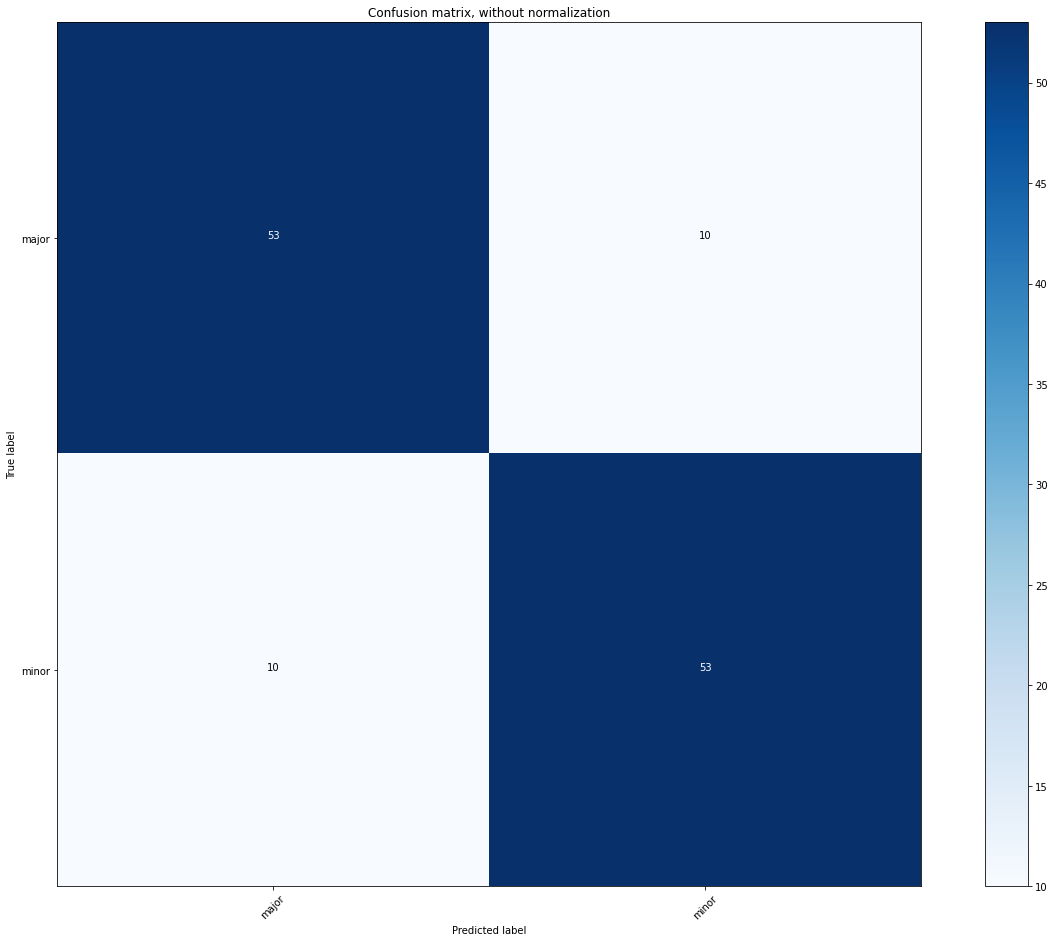

In [17]:
# Plot non-normalized confusion matrix
plt.figure(figsize=(18,13))
plot_confusion_matrix(cnf_matrix, classes=labelencoder.classes_,
                      title='Confusion matrix, without normalization')

In [18]:
# Find wrong predicted samples indexes
#wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]

In [19]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predicted_labels[wrong_predictions].T)
print(labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print(np.array(files)[test_index[wrong_predictions]])

['minor' 'major' 'minor' 'major' 'minor' 'major' 'minor' 'minor' 'major'
 'major' 'minor' 'minor' 'major' 'major' 'minor' 'major' 'minor' 'major'
 'minor' 'major']
[0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1]
['major' 'minor' 'major' 'minor' 'major' 'minor' 'major' 'major' 'minor'
 'minor' 'major' 'major' 'minor' 'minor' 'major' 'minor' 'major' 'minor'
 'major' 'minor']
['./shords_dataset/minor\\7_79.wav' './shords_dataset/major\\3_6.wav'
 './shords_dataset/minor\\6_14.wav' './shords_dataset/major\\4_1.wav'
 './shords_dataset/minor\\6_16.wav' './shords_dataset/major\\4_8.wav'
 './shords_dataset/minor\\6_42.wav' './shords_dataset/minor\\7_47.wav'
 './shords_dataset/major\\5_19.wav' './shords_dataset/major\\9_38.wav'
 './shords_dataset/minor\\2_16.wav' './shords_dataset/minor\\3_27.wav'
 './shords_dataset/major\\9_36.wav' './shords_dataset/major\\3_2.wav'
 './shords_dataset/minor\\1_1.wav' './shords_dataset/major\\4_11.wav'
 './shords_dataset/minor\\7_4.wav' './shords_dataset/major\\5_29.wa

In [20]:
import joblib
joblib.dump( model_knn ,'knn_Chords_model.pkl')

['knn_Chords_model.pkl']

In [50]:
# Varying Number of Neighbors
k_values = range(1, 30)
accuracy_scores = []

In [51]:
for k in k_values:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(train_set, train_classes)
    predicted_labels = model_knn.predict(test_set)
    accuracy_scores.append(accuracy_score(test_classes, predicted_labels))

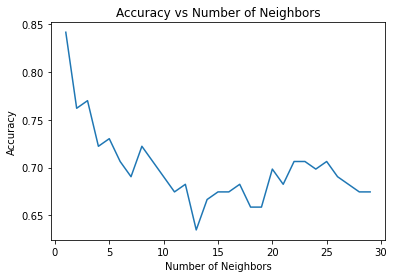

In [52]:
# Plotting Accuracy Graphs
plt.plot(k_values, accuracy_scores)
plt.title('Accuracy vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [53]:
# Print the test accuracy for the best k value
best_k = k_values[np.argmax(accuracy_scores)]
print(f'Test accuracy for k={best_k}: {accuracy_scores[np.argmax(accuracy_scores)]}')

Test accuracy for k=1: 0.8412698412698413


In [54]:
print(accuracy_scores)

[0.8412698412698413, 0.7619047619047619, 0.7698412698412699, 0.7222222222222222, 0.7301587301587301, 0.7063492063492064, 0.6904761904761905, 0.7222222222222222, 0.7063492063492064, 0.6904761904761905, 0.6746031746031746, 0.6825396825396826, 0.6349206349206349, 0.6666666666666666, 0.6746031746031746, 0.6746031746031746, 0.6825396825396826, 0.6587301587301587, 0.6587301587301587, 0.6984126984126984, 0.6825396825396826, 0.7063492063492064, 0.7063492063492064, 0.6984126984126984, 0.7063492063492064, 0.6904761904761905, 0.6825396825396826, 0.6746031746031746, 0.6746031746031746]
